## <center> Animated Easter Egg with PlotlyJS.jl and Plots.jl </center>

In [1]:
using PlotlyJS
using Plots
using Einsum
using Images,  FileIO 
import Printf.@sprintf

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-14369950744169613395\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-3919598722467234242\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-14369950744169613395\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

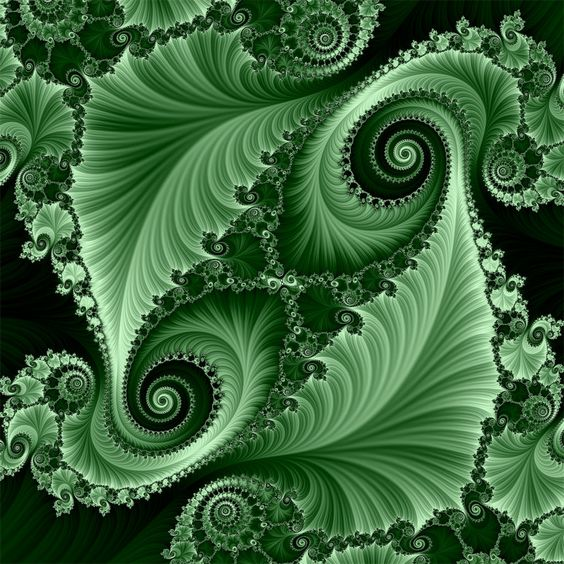

In [2]:
img=load("Images/green-fr.jpg")

In [3]:
imag =  Int64.(255*channelview(img)[2, :, :])
rows, cols = size(imag)

(564, 564)

In [4]:
function meshgrid(x::AbstractArray{Float64, 1}, y::AbstractArray{Float64, 1})
    X = x' .* ones(length(y))
    Y = ones(length(x))'.*y
    return X, Y
end

function egg(Nu::Int64, Nv::Int64; a =0.2, b=1.55)
    try  
        Nu >= Nv
    catch
        print("Only images of width greater or equal to the height are accepted here")
    end
   u, v =  meshgrid(range(0, 2pi, length=Nu), range(0, pi, length=Nv))
   x, y, z, =similar(u), similar(u), similar(u) 
   @.x = (1+a*v) * cos(u) * sin(v)
   @.y = (1+a*v) * sin(u) * sin(v)
   @.z = b * cos(v)
   return x, y, z     
end

function rotz(alpha)
    return [cos(alpha) -sin(alpha) 0;
            sin(alpha)  cos(alpha)  0;
            0           0           1]
end 

rotz (generic function with 1 method)

In [5]:
algae=[[0.0, "#d6f9cf"],
 [0.1, "#b7e2ab"],
 [0.2, "#95cd89"],
 [0.3, "#72ba6c"],
 [0.4, "#43a855"],
 [0.5, "#11934f"],
 [0.6, "#097d4a"],
 [0.7, "#156640"],
 [0.8, "#195034"],
 [0.9, "#183924"],
 [1.0, "#112414"]];


In [6]:
xs, ys, zs =  egg(cols, rows);
trace = PlotlyJS.surface( x=xs, 
                    y=ys, 
                    z=zs, 
                    colorscale=algae, 
                    surfacecolor=imag, 
                    showscale=false)

layout = PlotlyJS.Layout(
                  width=450,
                  height=450,
                  scene=attr(camera_eye=attr(x=-1.5,  y=1.5, z=0.5), #y=-0.8, z=1
                             aspectratio=attr(x=0.8, y=0.8, z=1), 
                             xaxis_visible=false,
                             yaxis_visible=false,
                             xaxis_zeroline=false,
                             zaxis_zeroline=false,
                             zaxis=attr(showbackground=true,
                                        backgroundcolor="#b7e2ab", 
                                        showgrid=false,
                                        showticklabels=false,
                                        title=" ")
                              ),
                    margin=attr(t=10, r=10, b=10, l=10));
#pl = PlotlyJS.plot(trace, layout)                 

Animate the egg rotation about zaxis:

Plots.AnimatedGif("C:\\Users\\emilia\\Documents\\AAAAAehtplot-work\\EasterGreenFrJulia.gif")
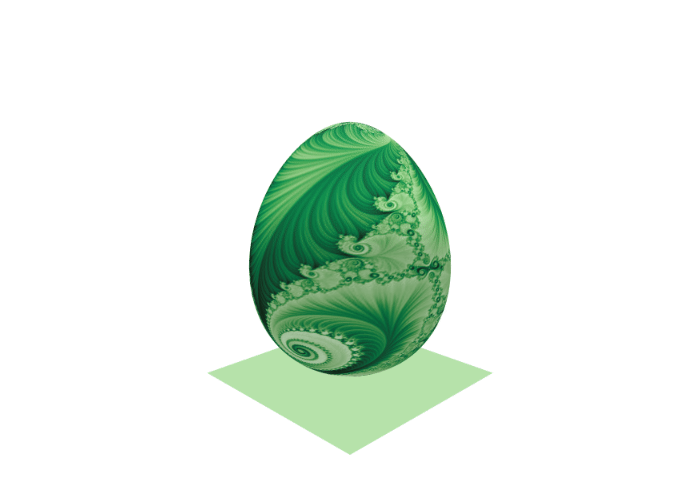

In [7]:
nframes = 60
fnames = String[]
xyz =  cat(xs, ys, zs, dims=3);
for k in 1:nframes
    alpha =2*(k-1)*pi/nframes
    Rot= rotz(alpha)
    @einsum eggnew[i, j, q]:= Rot[i, k]* xyz[j, q, k]
    trace[:x] = eggnew[1, :, :]
    trace[:y] = eggnew[2, :, :]
    trace[:z] = eggnew[3, :, :]
    pl2 = PlotlyJS.plot(trace, layout)
    filename = @sprintf("%06d.png", k)
    push!(fnames, filename)
    PlotlyJS.savefig(pl2, "Eggs/" * filename)
end   
anim = Plots.Animation("Eggs", fnames);
Plots.buildanimation(anim, "EasterGreenFrJulia.gif", fps = 15, show_msg=false)

.